In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [123]:
def getData(directory):
    #     end_time = 24 * 3600  # 24 hours
    for sdir_path, sdir in [
        (sdir.path, sdir.name)
        for sdir in sorted(os.scandir(directory), key=lambda x: int(x.name.split("_")[-1]))
        if sdir.is_dir()
    ]:
        print(sdir)
        for root, subdirs, files in os.walk(sdir_path):
            for file in files:
                dirs = root.split("/")
                if file == "0.trips.csv.gz" and "car" in dirs:
                    dists_car = pd.read_csv(os.path.join(root, file), sep=";")[
                        "traveled_distance"
                    ]
                if file == "0.vehicleDistanceStats_drt.csv" and "bimodal" in dirs:
                    dists_bim = pd.read_csv(os.path.join(root, file), sep=";")[
                        "drivenDistance_m"
                    ]
                if file == "trip_success.csv.gz":
                    rejections = pd.read_csv(
                        os.path.join(root, file), sep=";", header=None
                    )
        dist_train = (
            10000 * 40 * 4 * 24
        )  # Distance/line * number of lines * departures/hour * hours

        yield int(sdir.split("_")[-1]), dists_car, dists_bim, dist_train, rejections

In [133]:
path = "/home/helge/Applications/matsim/matsim_results_ssd/PeriodicBC/8DrtCap/OwnIntermodalAccEgr/CarbonIndex/varyingllprime/"

l_lps = np.empty(9)
carbon_indexs = np.empty(9)

for i,(l_lp, dists_car, dists_bim, dist_train, rejections) in enumerate(getData(path)):
    l_lps[i] = l_lp
    print(len(rejections[~rejections[1]]))
    dists_car_for_rejected = dists_car.loc[rejections[~rejections[1]][0].to_numpy()]
    carbon_index = (dists_bim.sum()+dists_car_for_rejected.sum()+dist_train)/dists_car.sum()
    carbon_indexs[i] = carbon_idx
    print(l_lp)
    print(carbon_index)

l_lp_2
39706
2
0.7341676902756237
l_lp_3
32748
3
0.6841914531081725
l_lp_4
31704
4
0.6846124816365926
l_lp_5
26952
5
0.6429989728497106
l_lp_6
27594
6
0.6476419911053787
l_lp_7
23092
7
0.6103593091367522
l_lp_8
22270
8
0.5998341400654882
l_lp_9
20749
9
0.581988593366358
l_lp_10
18474
10
0.5591019355734982


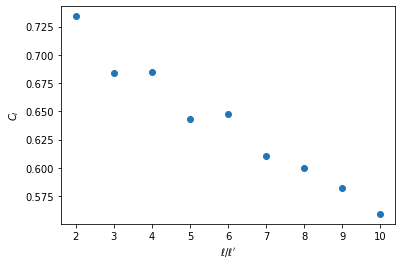

In [131]:
fig, ax = plt.subplots()

ax.scatter(l_lps, carbon_idxs)
ax.set_ylabel(r"$C_I$")
ax.set_xlabel(r"$\ell/\ell^\prime$")

fig.savefig("CarbonIdxVaryingllprime.png", dpi=200)
plt.show()